In [1]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import matplotlib.image as mpimg
from skimage.io import imread
# skimage.io.imshow is deprecated use matplotlib.pyplot.imshow instead
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
#import Tensorflow namespaces

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

import pickle




2025-03-30 13:30:40.667342: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 13:30:40.858189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743334240.928752    3489 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743334240.948982    3489 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-30 13:30:41.115286: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# Load training set and test set

training_data = unpickle('./cifar-10/data_batch_1')
test_data = unpickle('./cifar-10/test_batch')
print(f"{type(training_data) = }")
print(f"{type(training_data[b'data']) = }, {training_data[b'data'].shape = }, ")
print(f" {training_data[b'data'][0] = }")
# print(training_data.keys())
# print(type(training_data[b"data"]))
# print(training_data[b"data"].shape)
# print(training_data[b"data"])
# print("===================")
# print(training_data[b"data"][1])
# print("===================")
# rs1 = training_data[b"data"].reshape(len(X_train),3,32,32)
# print("+++++++++++++++++++")
# print(rs1[1, 0])
# print("+++++++++++++++++++")
# print(rs1)

type(training_data) = <class 'dict'>
type(training_data[b'data']) = <class 'numpy.ndarray'>, training_data[b'data'].shape = (10000, 3072), 
 training_data[b'data'][0] = array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)


In [4]:
#training_data

In [5]:
# Create training set and test set

X_train = training_data.get(b'data')
train_labels = training_data.get(b'labels')

X_test = test_data.get(b'data')
test_labels = test_data.get(b'labels')

# Reshape into Tensorflow format (number of images, width, height, color channels)

X_train = X_train.reshape((len(X_train),3,32,32)).transpose(0,2,3,1)
X_test  = X_test.reshape((len(X_test),3,32,32)).transpose(0,2,3,1)

print(X_train.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


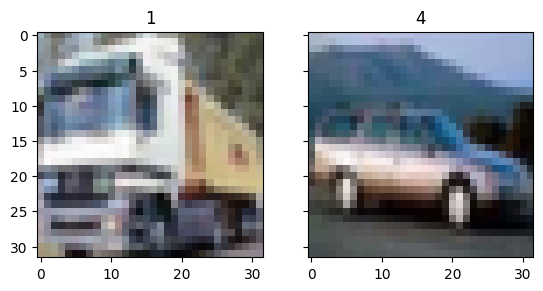

In [6]:
# Show image

fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].set_title("1")
axes[0].imshow(X_train[1])
axes[1].set_title("4")
axes[1].imshow(X_train[4])
# plt.axis('off')  # Hide axes
# plt.show()


In [7]:
# Image normalization

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding of the labels

y_train = to_categorical(train_labels)
y_test = test_labels

In [8]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 150 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)  # drie-kleuren kanaal

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) # Eerste parameter = aantal features die wordt gezocht
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

display(model.summary())
plot_model(model)


/home/sam/howest/howest-dl/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1743334286.471357    3489 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3574 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        57,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,688 (268.31 KB)

 Trainable params: 68,496 (267.56 KB)

 Non-trainable params: 192 (768.00 B)

None

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [9]:
# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/150


I0000 00:00:1743334296.940899    4267 service.cc:148] XLA service 0x7f63bc0031b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743334296.941195    4267 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A3000 Laptop GPU, Compute Capability 8.6
2025-03-30 13:31:36.989730: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743334297.172196    4267 cuda_dnn.cc:529] Loaded cuDNN version 90300


 52/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1795 - loss: 2.6239 

I0000 00:00:1743334300.090160    4267 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2245 - loss: 2.3883 - val_accuracy: 0.1090 - val_loss: 2.8262
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3685 - loss: 1.7475 - val_accuracy: 0.1875 - val_loss: 2.5072
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4326 - loss: 1.5627 - val_accuracy: 0.2725 - val_loss: 2.1679
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4714 - loss: 1.4690 - val_accuracy: 0.3505 - val_loss: 1.9334
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4984 - loss: 1.3616 - val_accuracy: 0.4635 - val_loss: 1.5430
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5286 - loss: 1.3203 - val_accuracy: 0.4675 - val_loss: 1.5466
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5336 - loss: 1.2915 - val_accuracy: 0.5445 - val_loss: 1.3308
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5346 - loss: 1.2679 - val_accuracy: 0.522

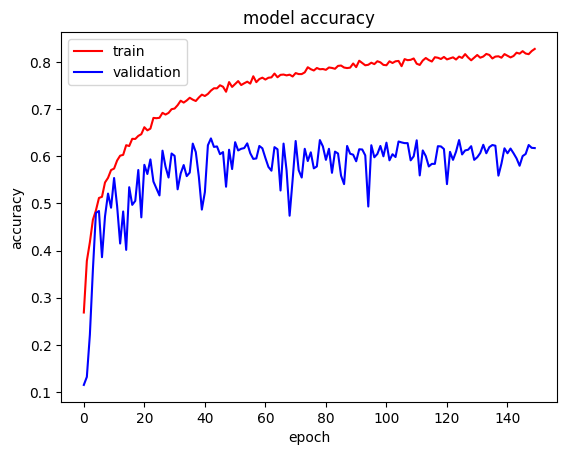

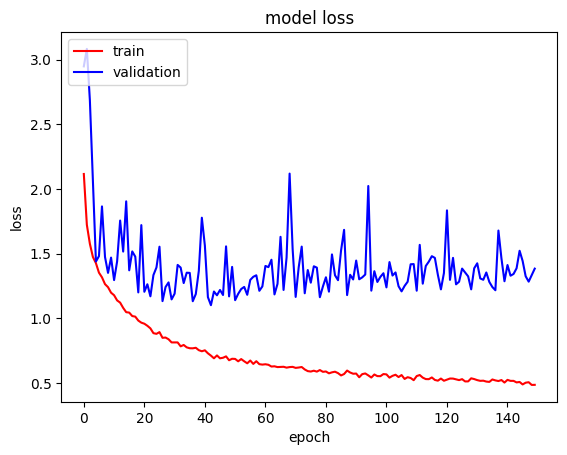

In [27]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
# Testing with the test set

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

AttributeError: 'Sequential' object has no attribute 'predict_classes'

### Transferlearning via VGG19

In [16]:
modelVGG19 = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
type(modelVGG19)

tensorflow.python.keras.engine.training.Model

In [17]:
# Convert to Keras model

model = Sequential()

for layer in modelVGG19.layers[:]:
    model.add(layer)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [18]:
# set coefficients to fixed

for layer in model.layers:
    layer.trainable = False

# Add custom dense layers

model.add(Flatten()) 
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',optimizer =adam,metrics=['accuracy'])
#model.summary()

In [20]:
X_train = preprocess_input(X_train)

In [22]:
# Train VGG model
batch_size =256
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size,  validation_split =0.2, epochs=epochs, verbose=1)

Epoch 1/50
32/32 [==============================] - 8s 247ms/step - loss: 2.2361 - accuracy: 0.1621 - val_loss: 2.2262 - val_accuracy: 0.1885
Epoch 2/50
32/32 [==============================] - 8s 247ms/step - loss: 2.2231 - accuracy: 0.1720 - val_loss: 2.2128 - val_accuracy: 0.1505
Epoch 3/50
32/32 [==============================] - 8s 247ms/step - loss: 2.2192 - accuracy: 0.1584 - val_loss: 2.2181 - val_accuracy: 0.2000
Epoch 4/50
32/32 [==============================] - 8s 258ms/step - loss: 2.2127 - accuracy: 0.1743 - val_loss: 2.2103 - val_accuracy: 0.1655
Epoch 5/50
32/32 [==============================] - 8s 257ms/step - loss: 2.2114 - accuracy: 0.1650 - val_loss: 2.2015 - val_accuracy: 0.1480
Epoch 6/50
32/32 [==============================] - 8s 255ms/step - loss: 2.2092 - accuracy: 0.1684 - val_loss: 2.2050 - val_accuracy: 0.1675
Epoch 7/50
32/32 [==============================] - 8s 260ms/step - loss: 2.2065 - accuracy: 0.1710 - val_loss: 2.2003 - val_accuracy: 0.1545
Epoch 